# ICU SURVIVAL PREDICTION: Data Processing and ML Model Training
## Table of Contents
- #### <a href="#dp" style='color:black; text-decoration:none'>Data Processing</a>
<ul>
<li><a href="#de">Data Encoding</a></li>
<li><a href="#dos">Data Oversampling</a></li>
<li><a href="#rfe">Feature Selection</a></li>
</ul>

- #### <a href="#mml" style='color:black; text-decoration:none'>ML Models</a>
<ul>
<li><a href="#lr">Logistic Regression</a></li>
<li><a href="#rfc">Random Forest Classifier</a></li>
<li><a href="#dtc">Decision Tree Classifier</a></li>
<li><a href="#gb">Gradient Booster</a></li>
<li><a href="#lgb">Light Gradient Booster</a></li>
<li><a href="#knn">KNeighbors Classifier</a></li>
</ul>
- #### <a href="#me" style='color:black; text-decoration:none' >Models Evaluation</a>
- #### <a href="#hpt" style='color:black; text-decoration:none'>Hyperparameter tunnig</a>
<ul>
<li><a href="#lrhpt">Logistic Regression parameter tunnig</a></li>
<li><a href="#xgbhpt">XGBooster parameter tunnig</a></li>
</ul>
- #### <a href="#conclusion" style='color:black; text-decoration:none' >Summary</a>


<a name="dp"></a>
# 1. Data Processing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../Datasets/clean_dataset.csv')

In [3]:
df.head(4)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,bmi_cat,Gcs,gcs_cat,age_cat,h1_pluse_P,heart_rate_cat,map_cat
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,Cardiac ICU,13.000000,...,Sepsis,Cardiovascular,0,normal,13.0,mild,old_adult,high,high,low
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,22.266667,...,Respiratory,Respiratory,0,overweight,5.0,sever,old_adult,low,high,low
2,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.016667,...,Neurological,Neurologic,0,overweight,15.0,normal,old_adult,normal,high,high
3,70.0,29.00,0,Caucasian,M,165.0,Accident & Emergency,admit,Med-Surg ICU,0.050000,...,Sepsis,Cardiovascular,0,overweight,15.0,normal,old_adult,normal,high,normal


In [4]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 84


> Most of these columns are repeatatives of other column  while some columns that start with d1_ are data recorded after 24 hours. The is to predict patient survival in the first few hours of ICU admission inorder to prioritise anad redeploy limited resources. 


In [5]:
# drop highly correclected and repeated columns
df=df.drop(columns=['d1_diasbp_min', 'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min', 'd1_heartrate_max',
                    'd1_heartrate_min','d1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min'
                    , 'd1_resprate_max', 'd1_resprate_min','d1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
                    'd1_sysbp_min','d1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
                    'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min','h1_diasbp_max', 'h1_diasbp_min',
                    'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min','h1_heartrate_max', 
                    'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min','h1_mbp_noninvasive_max', 
                    'h1_mbp_noninvasive_min','h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max','h1_sysbp_min',
                    'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min','d1_glucose_max', 'd1_glucose_min',
                    'd1_potassium_max','d1_potassium_min','age','weight','height','apache_2_diagnosis',
                    'apache_2_bodysystem','intubated_apache','d1_diasbp_max','h1_resprate_max', 'h1_resprate_min',
                    'gcs_unable_apache','heart_rate_apache','Gcs','bmi','apache_post_operative','cirrhosis',
                    'apache_4a_hospital_death_prob','elective_surgery','resprate_apache','map_apache'])

In [6]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 26


<a name="de"></a>
## 1.1 Data Encoding

### 1.11 Label Encoding

In [7]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [8]:
ordinal_col=['gcs_cat','bmi_cat','age_cat','h1_pluse_P','heart_rate_cat','map_cat','apache_3j_bodysystem','icu_type']

In [9]:
def labeling(col):
        df[col]=label.fit_transform(df[col])
for i in ordinal_col:
    labeling(i)

### 1.12 One Hot Encoding

In [10]:
# one hot encoding object and categorical columns
cat_cols=df.columns[df.dtypes == 'object']
print(cat_cols)
cat_cols=df[cat_cols]

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type'], dtype='object')


In [11]:
x=pd.get_dummies(cat_cols) # convert categorical columns to dummies
df=df.drop(cat_cols, axis=1) # drop original columns
df=df.join(x) #join dummies

In [12]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 61123
number of columns are: 38


<a home="dos"></a>
## 1.2 Data Oversampling

In [13]:
#Seperating dependent and independent feature
X=df.drop('hospital_death', axis=1)
y=df['hospital_death']

In [14]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train['hospital_death']=y_train # combine y_train back to oversample imbalance in dataset
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = X_train[X_train['hospital_death']==0]
df_minority = X_train[X_train['hospital_death']==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=44611,    # to match majority class
                                 random_state=123) # reproducible results
X_train= pd.concat([df_majority, df_minority_upsampled])

In [16]:
# seperataing back
y_train=X_train['hospital_death']
X_train=X_train.drop('hospital_death', axis=1)

## 1.3 Feature Selection

In [17]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train) 

In [18]:
mutual_info = pd.Series(mutual_info) #converts to pandas series
mutual_info.index = X_train.columns #set index as column
mutual_info.sort_values(ascending=False).head(15) #display top 15 in desc orde

apache_4a_icu_death_prob                      0.213068
pre_icu_los_days                              0.129793
apache_3j_diagnosis                           0.119072
gcs_cat                                       0.082520
ventilated_apache                             0.080243
temp_apache                                   0.055932
apache_3j_bodysystem                          0.033898
age_cat                                       0.024342
map_cat                                       0.023757
heart_rate_cat                                0.012565
icu_stay_type_admit                           0.009829
icu_admit_source_Operating Room / Recovery    0.009798
icu_type                                      0.008477
icu_admit_source_Floor                        0.007427
ethnicity_Caucasian                           0.007354
dtype: float64

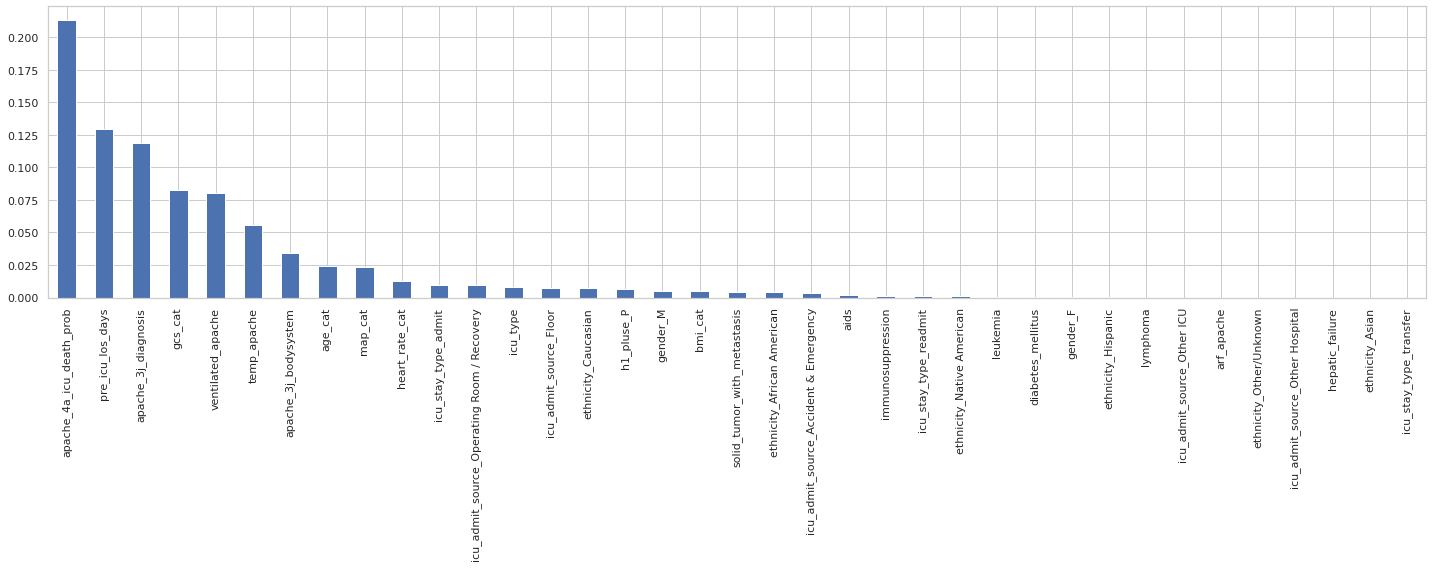

In [19]:
# plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.tight_layout();

In [20]:
from sklearn.feature_selection import SelectKBest
#top 11 important features using k best
sel_five_cols = SelectKBest(mutual_info_classif, k=14) #initalize
sel_five_cols.fit(X_train, y_train) # fit 
x=X_train.columns[sel_five_cols.get_support()] #saves columns in x
x

Index(['pre_icu_los_days', 'apache_3j_diagnosis', 'temp_apache',
       'ventilated_apache', 'apache_4a_icu_death_prob', 'apache_3j_bodysystem',
       'gcs_cat', 'age_cat', 'h1_pluse_P', 'heart_rate_cat', 'map_cat',
       'icu_admit_source_Floor', 'icu_admit_source_Operating Room / Recovery',
       'icu_stay_type_admit'],
      dtype='object')

In [21]:
# New train and test with 15 features
X_train=X_train[x]
X_test=X_test[x]

In [22]:
X_train.head(4)

,pre_icu_los_days,apache_3j_diagnosis,temp_apache,ventilated_apache,apache_4a_icu_death_prob,apache_3j_bodysystem,gcs_cat,age_cat,h1_pluse_P,heart_rate_cat,map_cat,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_stay_type_admit
29071,0.100000,107.01,35.9,0.0,0.04,0,2,1,0,1,1,0,0,1
12051,2.250000,501.05,36.6,0.0,0.13,9,2,1,1,0,1,0,0,1
16962,3.283333,501.02,36.5,0.0,0.04,9,2,1,2,0,0,0,0,1
10540,2.033333,109.01,36.6,0.0,0.01,0,2,1,0,0,2,0,0,1


In [23]:
# statmodles
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537706
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         hospital_death   No. Observations:                89222
Model:                          Logit   Df Residuals:                    89208
Method:                           MLE   Df Model:                           13
Date:                Tue, 28 Jun 2022   Pseudo R-squ.:                  0.2243
Time:                        19:12:38   Log-Likelihood:                -47975.
converged:                       True   LL-Null:                       -61844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
pre_icu_los_days                            

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

<a home="mml"></a>
# 2. ML Models

In [24]:
import re
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [25]:
# initalised empty list to append model metrics 
models = []
roc_aucs = []
recalls = []

In [26]:
# Helper functions

In [27]:
def fit_and_predict(algorithm):
    model = algorithm.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    p = "(.*)(\(.*)"
    s = str(model)
    models.append(f'{re.search(pattern=p, string=s).group(1)}')
    return [model, model_predictions]

In [28]:
def auc_and_recall_score(model_predictions):
    auc = roc_auc_score(y_test, model_predictions)
    roc_aucs.append(auc)
    recall = metrics.recall_score(y_test,model_predictions)
    recalls.append(recall)
    return [auc, recall]

In [29]:
def confusionMatrix_and_roc(model, model_predictions):
    plt.figure(figsize=(15,5))
    ax1=plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, model_predictions)
    sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')

    ax2=plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    p = "(.*)(\(.*)"
    s = str(model)
    sns.lineplot(fpr, tpr, label=f'{re.search(pattern=p, string=s).group(1)} auc: {round(auc,2)}',ax=ax2)
    sns.lineplot([0, 1], [0, 1], ax=ax2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return plt.show()

<a name="lr"></a>
## 2.1 Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [31]:
#%%timeit -n 1
lr_model, lr_pred= fit_and_predict(lr)

In [32]:
auc, recall = auc_and_recall_score(lr_pred)

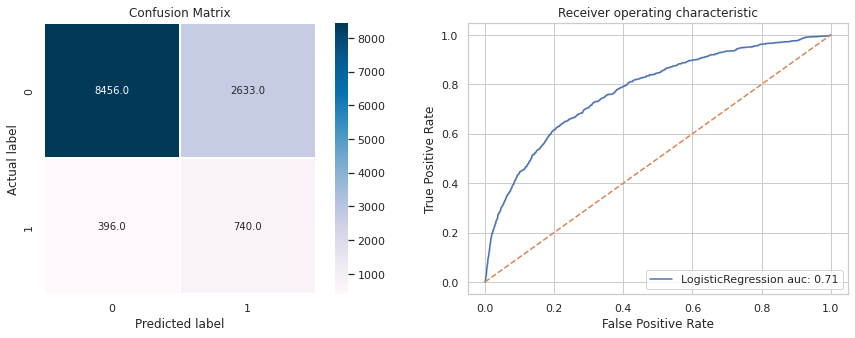

In [33]:
confusionMatrix_and_roc(lr_model, lr_pred)

In [34]:
print('classification_report for Logistic Regression', '\n')
print(classification_report(y_test, lr_pred))

classification_report for Logistic Regression 

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     11089
           1       0.22      0.65      0.33      1136

    accuracy                           0.75     12225
   macro avg       0.59      0.71      0.59     12225
weighted avg       0.89      0.75      0.80     12225



<a name="rfc"></a>
## 2.2 Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [36]:
#%%timeit -n 1
rf_model, rf_pred = fit_and_predict(rf)

In [37]:
auc, recall = auc_and_recall_score(rf_pred)

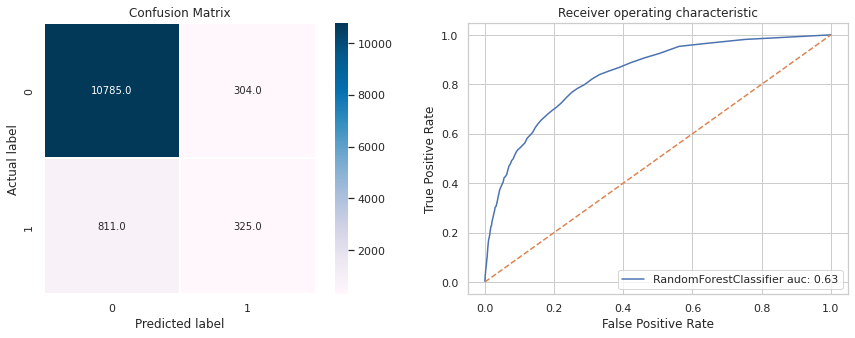

In [38]:
confusionMatrix_and_roc(rf_model, rf_pred)

In [39]:
print('classification_report for Random Forest', '\n')
print(classification_report(y_test, rf_pred))

classification_report for Random Forest 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11089
           1       0.52      0.29      0.37      1136

    accuracy                           0.91     12225
   macro avg       0.72      0.63      0.66     12225
weighted avg       0.89      0.91      0.90     12225



<a name="dtc"></a>
## 2.3 Decision Tree Classifier

In [40]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [41]:
#%%timeit -n 1
dt_model, dt_pred = fit_and_predict(dt)

In [42]:
auc, recall = auc_and_recall_score(dt_pred)

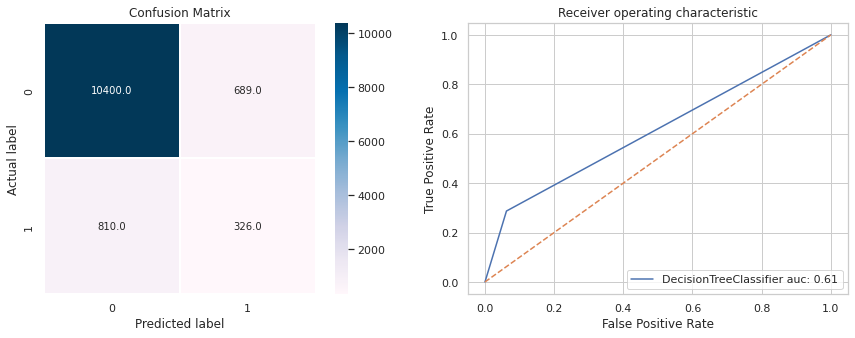

In [43]:
confusionMatrix_and_roc(dt, dt_pred)

In [44]:
print('classification_report for Decision Tree', '\n')
print(classification_report(y_test, dt_pred))

classification_report for Decision Tree 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11089
           1       0.32      0.29      0.30      1136

    accuracy                           0.88     12225
   macro avg       0.62      0.61      0.62     12225
weighted avg       0.87      0.88      0.87     12225



<a name="gb"></a>
## 2.4 Gradient Booster

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [46]:
#%%timeit -n 1
gb_model, gb_pred = fit_and_predict(gb)

In [47]:
auc, recall = auc_and_recall_score(gb_pred)

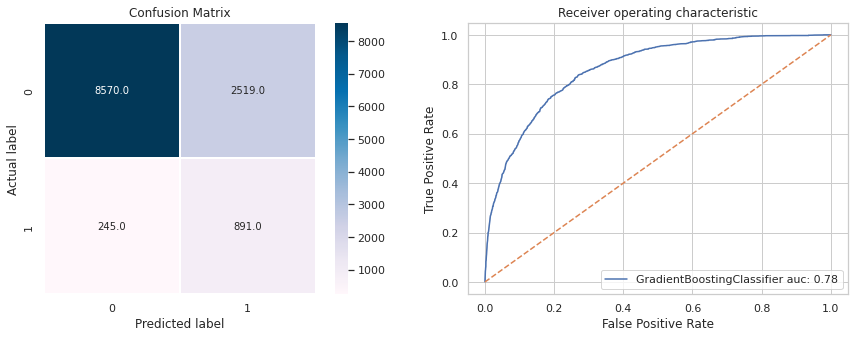

In [48]:
confusionMatrix_and_roc(gb_model, gb_pred)

In [49]:
print('classification_report for Gradient Booster, \n')
print(classification_report(y_test, gb_pred))

classification_report for Gradient Booster, 

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11089
           1       0.26      0.78      0.39      1136

    accuracy                           0.77     12225
   macro avg       0.62      0.78      0.63     12225
weighted avg       0.91      0.77      0.82     12225



<a name="gb"></a>
## 2.5 Light Gradient Booster

In [50]:
import lightgbm as Lgb
lgb = Lgb.LGBMClassifier(silent=True, random_state = 14, metric='roc_auc', learning_rate=0.01,max_depth= 6,
                         num_iterations= 500, num_leaves=10,)

In [51]:
#%%timeit -n 1
lgb_model, lgb_pred = fit_and_predict(lgb)

In [52]:
auc, recall = auc_and_recall_score(lgb_pred)

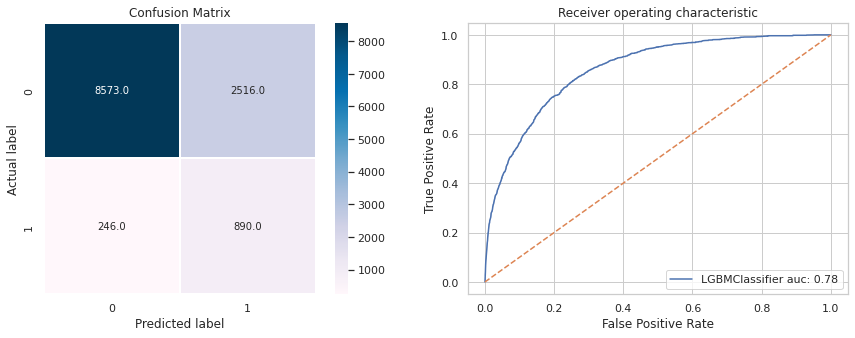

In [53]:
confusionMatrix_and_roc(lgb_model, lgb_pred)

In [54]:
print('classification_report for Light Gradient Booster, \n')
print(classification_report(y_test, lgb_pred))

classification_report for Light Gradient Booster, 

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11089
           1       0.26      0.78      0.39      1136

    accuracy                           0.77     12225
   macro avg       0.62      0.78      0.63     12225
weighted avg       0.91      0.77      0.82     12225



<a name="knn"></a>
## 2.6 KNeighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [56]:
#%%timeit -n 1
knn_model, knn_pred = fit_and_predict(knn)

In [57]:
auc, recall = auc_and_recall_score(knn_pred)

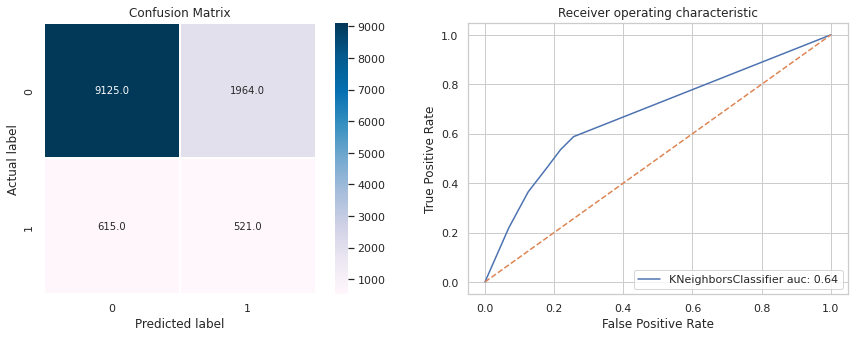

In [58]:
confusionMatrix_and_roc(knn_model, knn_pred)

In [59]:
print('classification_report for KNeighbors, \n')
print(classification_report(y_test, knn_pred))

classification_report for KNeighbors, 

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     11089
           1       0.21      0.46      0.29      1136

    accuracy                           0.79     12225
   macro avg       0.57      0.64      0.58     12225
weighted avg       0.87      0.79      0.82     12225



<a name="ml"></a>
# 3. Model Evaluation

In [60]:
#creates a dataframe of model AUC and recalls
model_metrics = pd.DataFrame({
    'models' : models,
    'roc_aucs' : roc_aucs,
    'recalls' : recalls
})
model_metrics

,models,roc_aucs,recalls
0,LogisticRegression,0.706983,0.651408
1,RandomForestClassifier,0.629338,0.286092
2,DecisionTreeClassifier,0.612419,0.286972
3,GradientBoostingClassifier,0.778584,0.784331
4,LGBMClassifier,0.778280,0.783451
5,KNeighborsClassifier,0.640757,0.458627


In [61]:
model_metrics.to_csv('../Datasets/model_metrics.csv', index=False)

In [62]:
model_metrics=round(pd.read_csv('../Datasets/model_metrics.csv'),2)

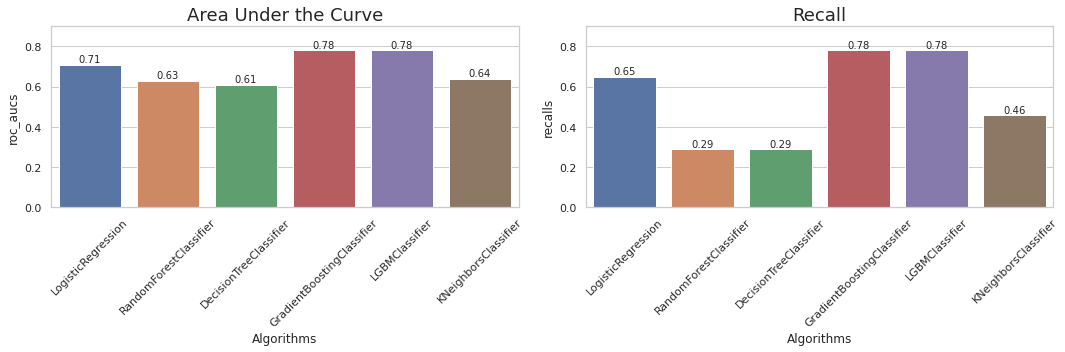

In [63]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 2, 1)
ax=sns.barplot(data=model_metrics, x='models', y='roc_aucs', ax=ax1)
plt.xlabel('Algorithms')
plt.title('Area Under the Curve', fontsize=18)
plt.ylim([0.0, 0.9])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

ax2=plt.subplot(1, 2, 2)
ax=sns.barplot(data=model_metrics, x='models', y='recalls', ax=ax2)
plt.xlabel('Algorithms')
plt.title('Recall', fontsize=18)
plt.ylim([0.0, 0.9])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout();

- From the graph above, Gradient Booster classifer  and  Light Gradeint Booster has the highest area under the curve of ```0.78``` on test data and a recall of ```0.78```with default parameter. Both algorimthms will be tunned with different parameter for best scores

<a name="hpt"></a>
# 4. Hyperparameter Tuning.

In [64]:
from sklearn.model_selection import RandomizedSearchCV

<a name="xgbpt"></a>
## 4.1 Gradient Boosting Parameters Tuning 

In [65]:
parameters ={# Setting training with parameters
    "learning_rate":[0.01, 0.1],
    'n_estimators':[100, 500, 1000], 
    'subsample':[0.1, 0.3, 0.6, 0.9, 1],
    'max_depth':[3, 6, 9],}

In [66]:
gb=GradientBoostingClassifier()
gb_rscv = RandomizedSearchCV(gb, parameters,scoring='roc_auc', cv=3, n_iter=3)
gb_tuned = gb_rscv.fit(X_train,y_train)
print("train_auc :",gb_tuned.best_score_)

train_auc : 0.8710871336152417


In [67]:
gb_tuned_predictions=gb_tuned.predict(X_test)
auc = roc_auc_score(y_test, gb_tuned_predictions)
print("test_auc: ",auc)

test_auc:  0.7785844667155245


In [68]:
print("tuned hpyerparameters :(best parameters) ",gb_tuned.best_params_)

tuned hpyerparameters :(best parameters)  {'subsample': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


## 4.2 Light Gradient Booster Parameters Tuning 

In [69]:
parameters ={# Setting training with parameters
    "learning_rate":[0.01, 0.001],# ,
    'num_iterations':[500, 700, 1000], 
    'num_leaves':[5, 10, 15],
    'max_depth':[3, 6, 9]}

In [70]:
lgb = Lgb.LGBMClassifier()
lgb_rscv = RandomizedSearchCV(lgb, parameters,scoring='roc_auc', cv=3, n_iter=3)
lgb_tuned = lgb_rscv.fit(X_train,y_train)
print("train_auc :",lgb_tuned.best_score_)

train_auc : 0.8690252700532076


In [71]:
lgb_tuned_predictions=lgb_tuned.predict(X_test)
auc = roc_auc_score(y_test, lgb_tuned_predictions)
print("test_auc: ",auc)

test_auc:  0.7782795950561334


In [72]:
print("tuned hpyerparameters :(best parameters) ",lgb_tuned.best_params_)

tuned hpyerparameters :(best parameters)  {'num_leaves': 10, 'num_iterations': 500, 'max_depth': 6, 'learning_rate': 0.01}


<a name="conclusion"></a>
# 5. Summary

- After data proccessing and fitting with different classifiers, Both light Gradient Boosting Classifier  Gradient Boosting Classifier peformed best among other classifer with a roc_auc of ```0.78``` and recall of ```0.78```.  - - - Light Gradient Boosting model will be safed as ```lgb_model.pkl``` for deployment as it has several advantage over Gradient Boosting such as:
> 1. Faster traning time
> 2. Lower memory usage 
> 3. Support parrallisation on distributed systems

In [73]:
import pickle
filename ='../Model/pickel_lgb_model.pkl'
pickle.dump(lgb_model, open(filename, 'wb'))
